<a href="https://colab.research.google.com/github/nikhil697/Parameter-Optimization/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parameter Optimization for Multiclass Dataset**

In [2]:
!pip install ucimlrepo
!pip install bayesian-optimization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [5]:
print("First few rows of features (X):")
print(X.head())

First few rows of features (X):
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913

In [6]:
print("\nFirst few rows of targets (y):")
print(y.head())


First few rows of targets (y):
   Class
0  SEKER
1  SEKER
2  SEKER
3  SEKER
4  SEKER


In [7]:
print(y)

          Class
0         SEKER
1         SEKER
2         SEKER
3         SEKER
4         SEKER
...         ...
13606  DERMASON
13607  DERMASON
13608  DERMASON
13609  DERMASON
13610  DERMASON

[13611 rows x 1 columns]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)

In [9]:
# kernels = ['linear', 'poly', 'sigmoid', 'rbf', 'anovadot']
kernels=['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}

In [10]:
def evaluate_svm(kernel, nu, tol):
  kernel_name = kernels[int(kernel)]
  model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [11]:
# results = []
# optimizers = []
# for sample in range(1):
#   optimizer = BayesianOptimization(evaluate_svm, pbounds)
#   optimizer.maximize(init_points=5, n_iter=20)
#   best_params = optimizer.max['params']
#   best_accuracy = optimizer.max['target']
#   results.append((sample, best_accuracy, best_params))
#   optimizers.append(optimizer)

results = []
optimizers = []
targets = []  # Store target values (accuracy scores)
iteration_counts = []  # Store iteration counts

for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))
    optimizers.append(optimizer)

    # Store target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])

|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.4584    | 0.321     | 0.0751    | 0.1563    |
| 2         | 0.5306    | 1.996     | 0.08027   | 0.3781    |
| 3         | 0.5656    | 0.6561    | 0.02601   | 0.4543    |
| 4         | 0.4084    | 0.4452    | 0.02878   | 0.1516    |
| 5         | 0.6109    | 1.899     | 0.09599   | 0.7357    |
| 6         | 0.3631    | 0.945     | 0.07832   | 0.5138    |
| 7         | 0.536     | 0.03953   | 0.03096   | 0.7288    |
| 8         | 0.5732    | 1.93      | 0.09088   | 0.6197    |
| 9         | 0.5487    | 1.897     | 0.09128   | 0.7329    |
| 10        | 0.5492    | 1.941     | 0.08145   | 0.6243    |
| 11        | 0.5208    | 1.889     | 0.09008   | 0.7376    |
| 12        | 0.5837    | 1.924     | 0.09995   | 0.6041    |
| 13        | 0.5717    | 1.909     | 0.1       | 0.7426    |
| 14        | 0.4826    | 0.7421    | 0.05014   | 0.2869    |
| 15    

In [12]:
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)

   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.707395  {'kernel': 1.5981069360029536, 'nu': 0.0500499...
1       1       0.722821  {'kernel': 1.9761245877842735, 'nu': 0.0676257...
2       2       0.741675  {'kernel': 1.8548556502861813, 'nu': 0.0955596...
3       3       0.675318  {'kernel': 1.7255506326622496, 'nu': 0.0709528...
4       4       0.713271  {'kernel': 1.9033568562683727, 'nu': 0.0144996...
5       5       0.700294  {'kernel': 1.0702222109707482, 'nu': 0.0309417...
6       6       0.700294  {'kernel': 1.439044334879152, 'nu': 0.06187985...
7       7       0.699314  {'kernel': 1.5680718388243242, 'nu': 0.0974654...
8       8       0.720862  {'kernel': 1.7400440000621349, 'nu': 0.0399567...
9       9       0.698090  {'kernel': 1.5524195651468382, 'nu': 0.0377495...


In [13]:
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"Sample with maximum accuracy: {max_accuracy_sample['Sample']}")

Sample with maximum accuracy: 2


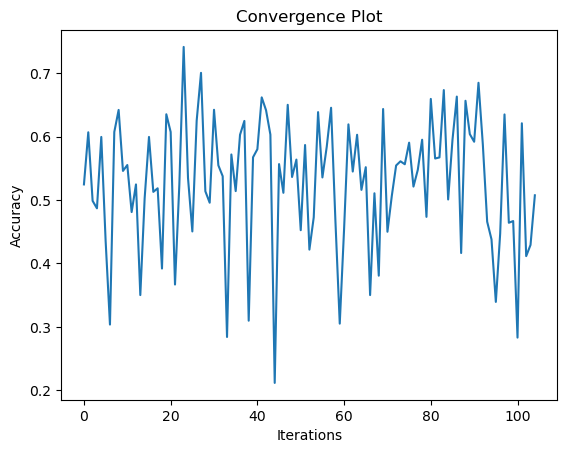

In [14]:
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
iterations = range(iteration_counts[max_accuracy_optimizer_idx])
plt.plot(iterations, targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot')
plt.show()